# Task 7 : Timeline Analysis : Covid-19

### Name : Sampada Suryawanshi

### Objective : Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advanced charts.


In [1]:
##Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
dataset = pd.read_csv("C:\\Users\\dell\\Downloads\\owid-covid-data.csv")
print(len(dataset))
dataset.head(3)

51147


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
dataset.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [4]:
print(" Here we are checking the DataTypes of various features from our dataset","\n")
dataset.info() 

 Here we are checking the DataTypes of various features from our dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51147 entries, 0 to 51146
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         50853 non-null  object 
 1   continent                        50559 non-null  object 
 2   location                         51147 non-null  object 
 3   date                             51147 non-null  object 
 4   total_cases                      47553 non-null  float64
 5   new_cases                        50281 non-null  float64
 6   new_cases_smoothed               49495 non-null  float64
 7   total_deaths                     38789 non-null  float64
 8   new_deaths                       50281 non-null  float64
 9   new_deaths_smoothed              49495 non-null  float64
 10  total_cases_per_million          47295 non-null  float64
 11  new_c

In [5]:
dataset.isna()  # if anywhere there is True, it means that cell value is missing.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
1,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
2,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
3,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
4,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51142,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
51143,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
51144,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
51145,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [6]:
# Dealing with null values
dataset.isna().sum()
print("Total count of missing values in our dataset is: ",dataset.isna().sum().sum())

Total count of missing values in our dataset is:  473143


In [7]:
df=dataset.dropna()
df


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
3845,BGD,Asia,Bangladesh,2020-03-22,24.0,7.0,3.000,2.0,2.0,0.286,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
3846,BGD,Asia,Bangladesh,2020-03-23,27.0,3.0,3.429,3.0,1.0,0.429,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
3847,BGD,Asia,Bangladesh,2020-03-24,33.0,6.0,4.000,3.0,0.0,0.429,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
3848,BGD,Asia,Bangladesh,2020-03-25,39.0,6.0,4.429,4.0,1.0,0.571,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
3849,BGD,Asia,Bangladesh,2020-03-26,39.0,0.0,4.143,5.0,1.0,0.714,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50547,ZWE,Africa,Zimbabwe,2020-10-08,7919.0,4.0,11.571,229.0,0.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
50548,ZWE,Africa,Zimbabwe,2020-10-09,7951.0,32.0,14.429,229.0,0.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
50549,ZWE,Africa,Zimbabwe,2020-10-10,7994.0,43.0,19.429,229.0,0.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
50550,ZWE,Africa,Zimbabwe,2020-10-11,8010.0,16.0,17.857,230.0,1.0,0.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [8]:
# Describing the data
print("Getting some insights about features using descriptive statistics of ","\n")
df.describe()

Getting some insights about features using descriptive statistics of  



,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,3.930000e+03,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.00000,...,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000
mean,1.531613e+05,2600.940967,2534.648231,4084.710941,60.147583,58.934341,1153.820319,16.276402,15.846404,31.03223,...,7701.255653,18.701272,260.922133,6.817445,3.715089,30.438855,52.421125,1.475471,69.151351,0.627881
std,6.398417e+05,10827.387849,10642.162189,13601.299634,183.868895,176.002537,2163.106134,33.202336,28.131065,77.95975,...,6203.588955,20.782837,85.722353,2.583683,2.778156,16.107006,29.491788,1.322742,5.118269,0.102526
min,8.000000e+00,0.000000,0.143000,1.000000,0.000000,0.000000,0.138000,0.000000,0.006000,0.00300,...,1095.042000,0.100000,109.861000,1.820000,0.300000,7.700000,7.960000,0.300000,60.850000,0.437000
25%,1.267000e+03,14.000000,18.000000,21.000000,0.000000,0.286000,45.920000,0.680750,1.001500,0.83100,...,2442.804000,2.200000,200.380000,4.970000,1.200000,20.400000,24.651000,0.700000,64.130000,0.562000
50%,7.115500e+03,169.000000,167.214500,126.000000,2.000000,2.785500,219.285500,4.136000,4.407000,4.14600,...,5591.597000,12.000000,260.797000,7.110000,2.800000,24.700000,55.182000,1.300000,69.660000,0.608000
75%,5.412175e+04,930.750000,838.821500,1044.500000,18.000000,17.393250,1126.036500,16.825250,16.371250,19.43050,...,11188.744000,26.700000,307.846000,8.350000,6.300000,37.800000,79.287000,1.700000,73.600000,0.702000
max,7.175880e+06,97894.000000,93198.571000,109856.000000,2003.000000,1168.000000,11609.294000,1024.993000,212.173000,605.57100,...,24055.588000,71.400000,466.792000,13.060000,9.500000,76.100000,98.999000,6.700000,77.150000,0.800000


In [9]:
df.nunique()

iso_code                             24
continent                             4
location                             24
date                                214
total_cases                        3343
new_cases                          1588
new_cases_smoothed                 2577
total_deaths                       1535
new_deaths                          426
new_deaths_smoothed                 814
total_cases_per_million            3643
new_cases_per_million              2656
new_cases_smoothed_per_million     3105
total_deaths_per_million           2363
new_deaths_per_million              740
new_deaths_smoothed_per_million     957
new_tests                          3172
total_tests                        3915
total_tests_per_thousand           3452
new_tests_per_thousand              668
new_tests_smoothed                 3106
new_tests_smoothed_per_thousand     637
tests_per_case                     3731
positive_rate                       414
tests_units                           4


In [10]:
print(df.shape)      #shape of dataset

(3930, 41)


In [11]:
df.count() #Used to count the number of rows

iso_code                           3930
continent                          3930
location                           3930
date                               3930
total_cases                        3930
new_cases                          3930
new_cases_smoothed                 3930
total_deaths                       3930
new_deaths                         3930
new_deaths_smoothed                3930
total_cases_per_million            3930
new_cases_per_million              3930
new_cases_smoothed_per_million     3930
total_deaths_per_million           3930
new_deaths_per_million             3930
new_deaths_smoothed_per_million    3930
new_tests                          3930
total_tests                        3930
total_tests_per_thousand           3930
new_tests_per_thousand             3930
new_tests_smoothed                 3930
new_tests_smoothed_per_thousand    3930
tests_per_case                     3930
positive_rate                      3930
tests_units                        3930


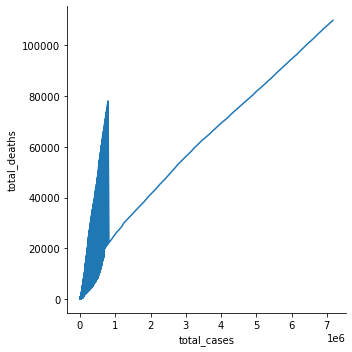

In [12]:
sns.relplot(x="total_cases", y="total_deaths",kind="line",data=df)

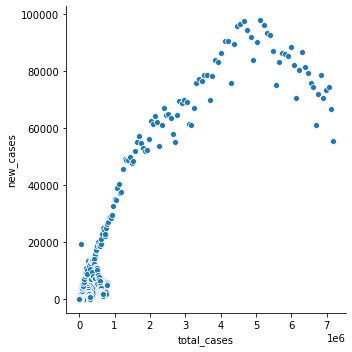

In [13]:
sns.relplot(x="total_cases", y="new_cases",data=df)

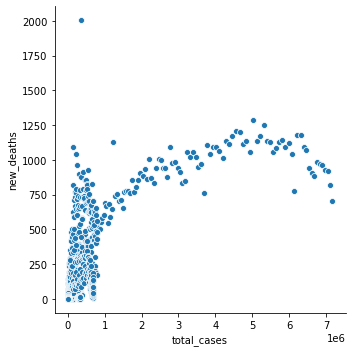

In [14]:
sns.relplot(x="total_cases", y="new_deaths",data=df)

In [15]:
#sns.catplot(x="total_cases",y="new_deaths",data=df)

In [16]:
df1=df[["date","total_cases","new_cases","total_deaths","new_tests","total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
3845,2020-03-22,24.0,7.0,2.0,56.0,620.0
3846,2020-03-23,27.0,3.0,3.0,92.0,712.0
3847,2020-03-24,33.0,6.0,3.0,82.0,794.0
3848,2020-03-25,39.0,6.0,4.0,126.0,920.0
3849,2020-03-26,39.0,0.0,5.0,106.0,1026.0


In [17]:
df1.mean()

total_cases     1.531613e+05
new_cases       2.600941e+03
total_deaths    4.084711e+03
new_tests       2.848094e+04
total_tests     1.597375e+06
dtype: float64

 This is the correlation matrix, used to get idea about the extent of linear relationship between the variables
[-1,0) represents Negative Correlation 
 0 represents No Correlation 
 (0,+1] represents Positive Correlation 


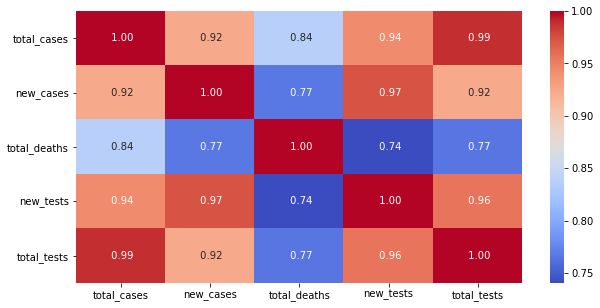

In [18]:
print(" This is the correlation matrix, used to get idea about the extent of linear relationship between the variables")
print("[-1,0) represents Negative Correlation","\n","0 represents No Correlation","\n","(0,+1] represents Positive Correlation ")
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),cbar=True,fmt =' .2f', annot=True, cmap='coolwarm')
plt.show();


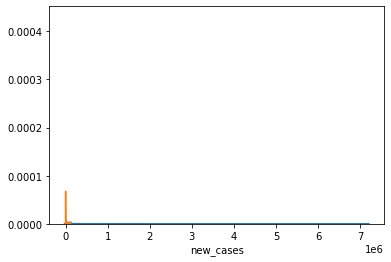

In [19]:
sns.distplot(df1['total_cases'])
sns.distplot(df1['new_cases']);


Text(0.5, 0, 'Month')

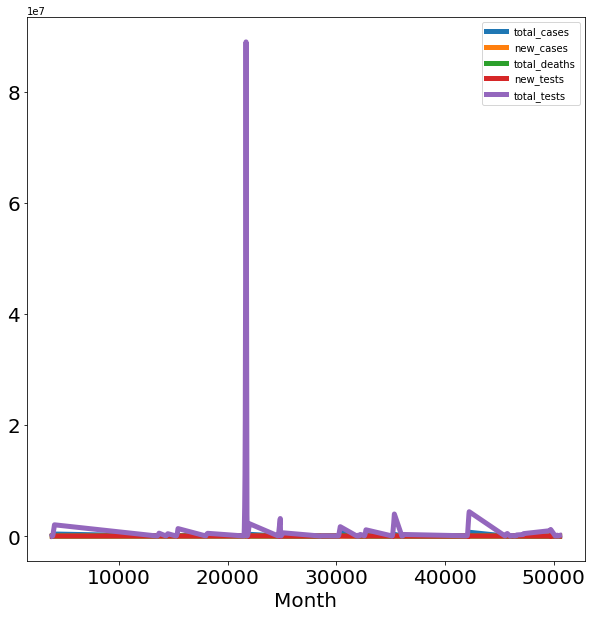

In [20]:
df1.plot(figsize = (10 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

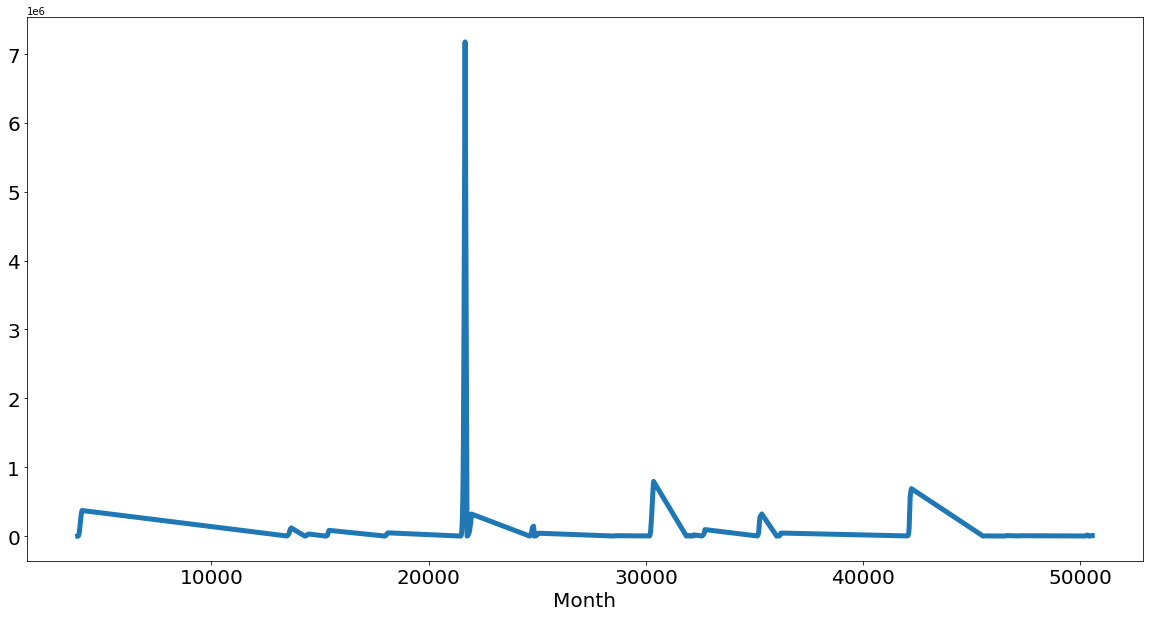

In [21]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

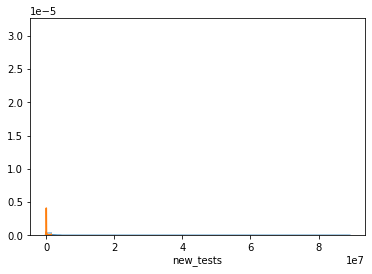

In [22]:
sns.distplot(df1['total_tests'])
sns.distplot(df1['new_tests']);


Text(0.5, 0, 'Month')

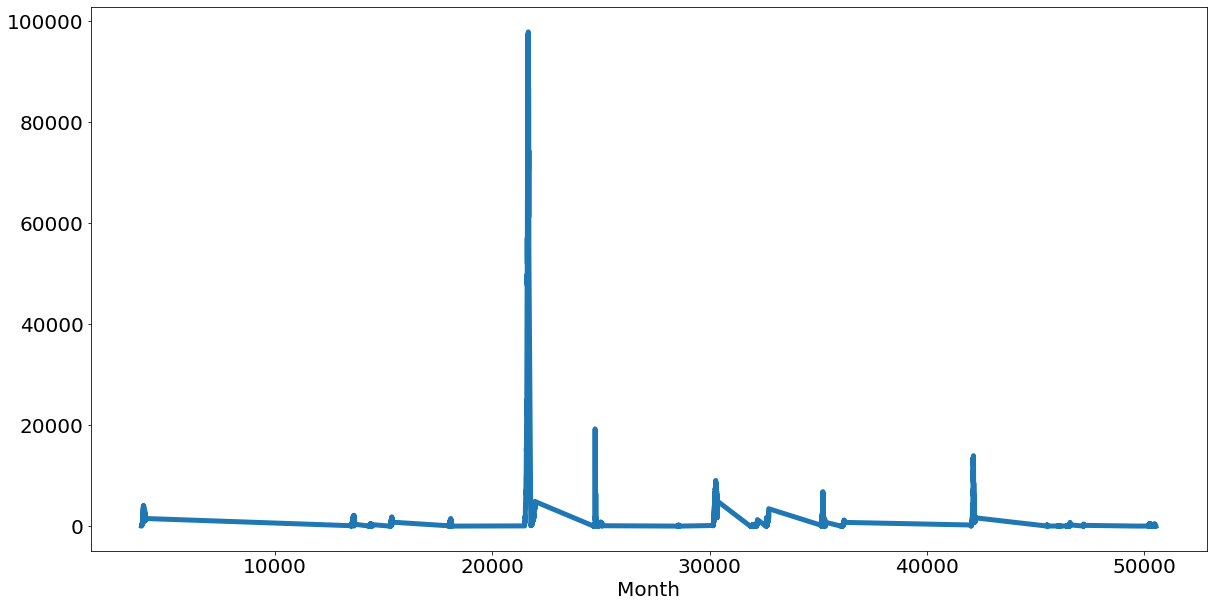

In [23]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

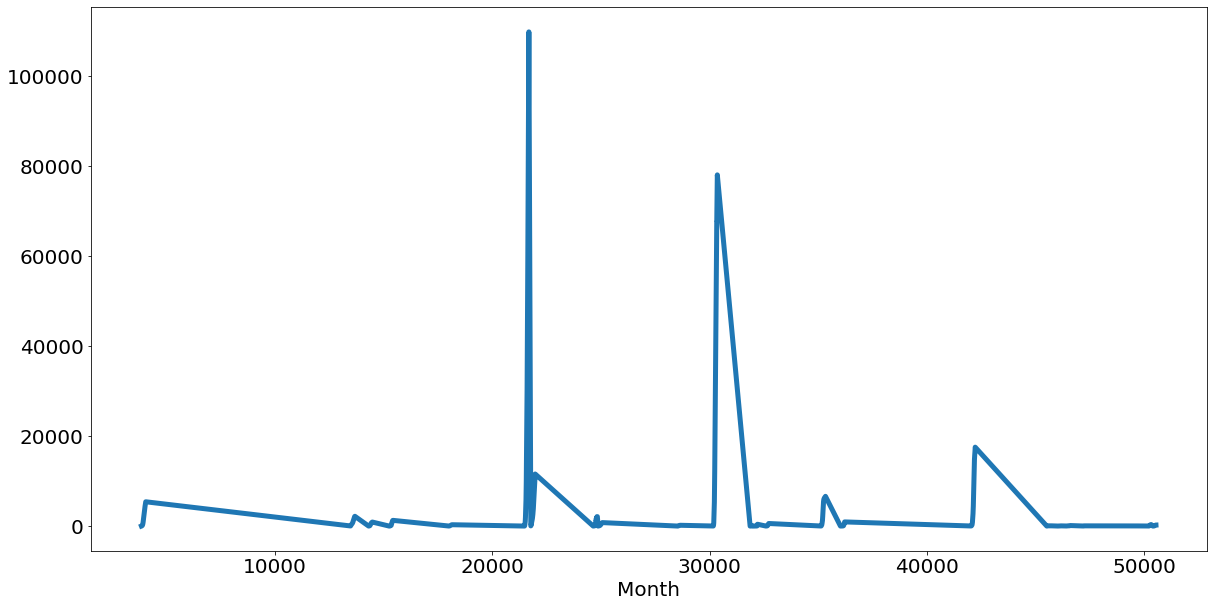

In [24]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

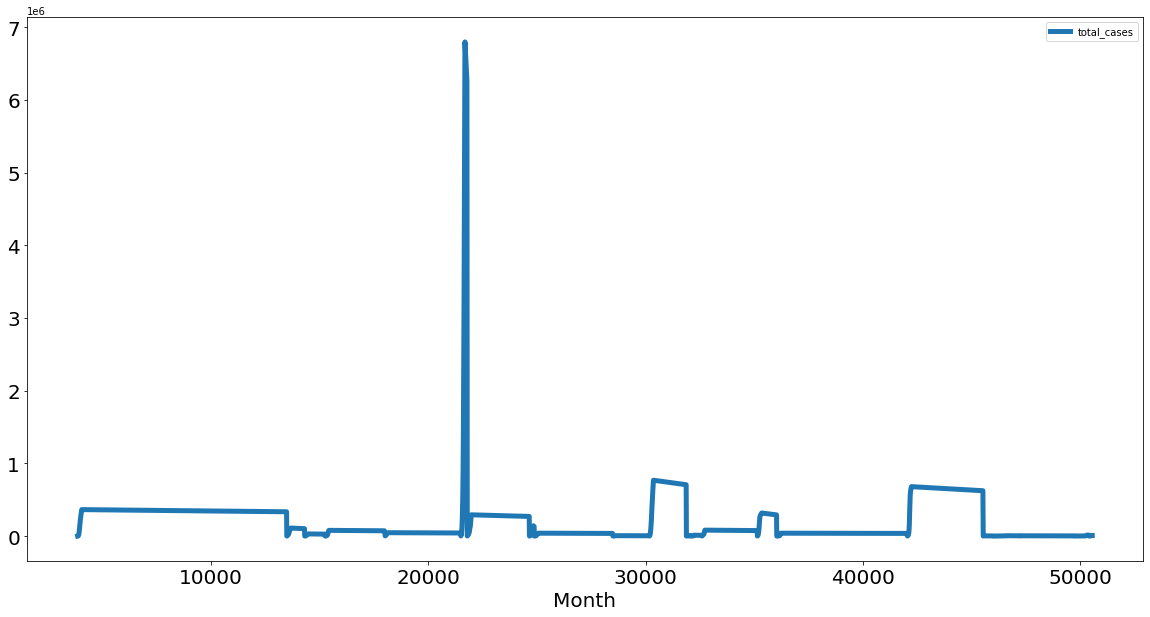

In [25]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

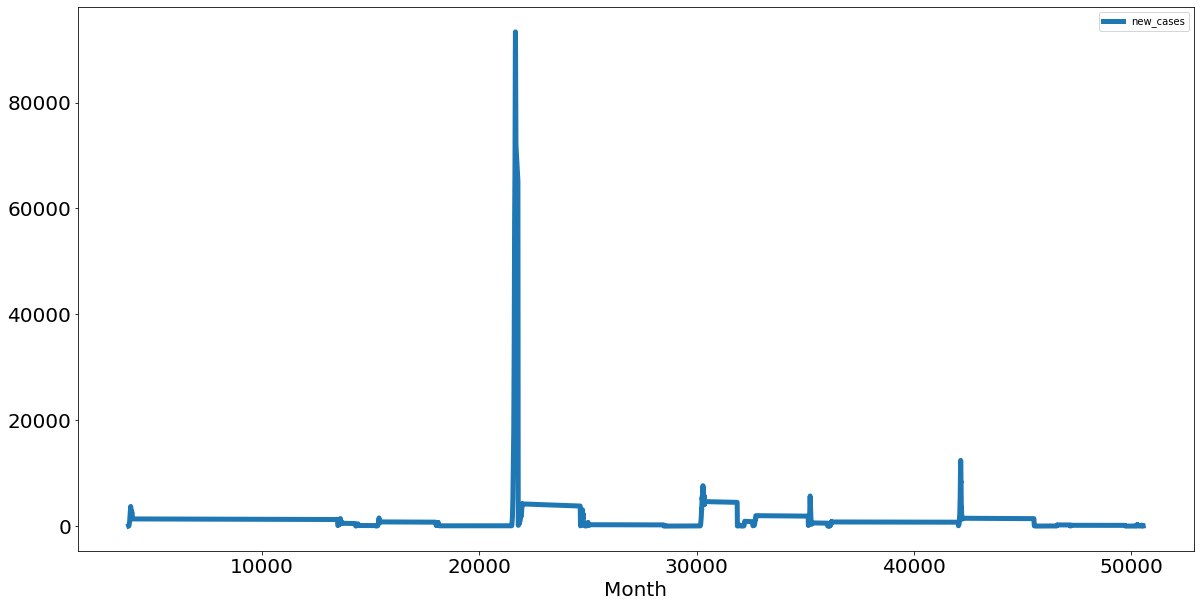

In [26]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


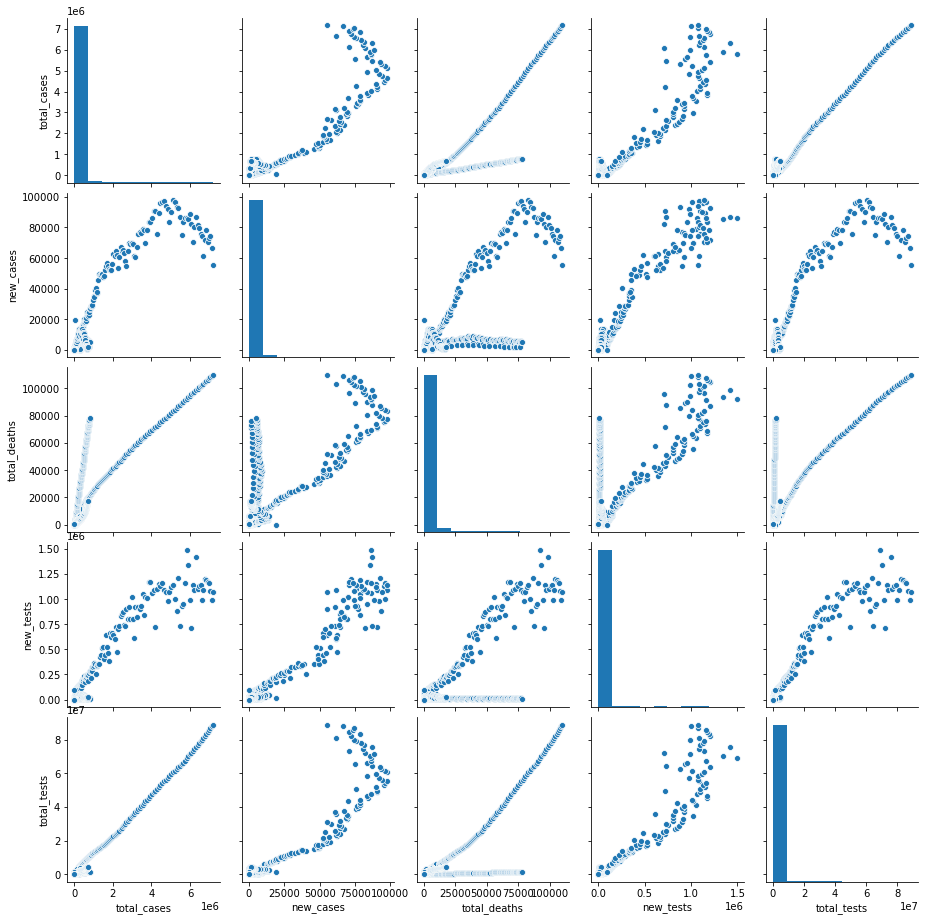

In [27]:
sns.pairplot(df1, size=2.5)

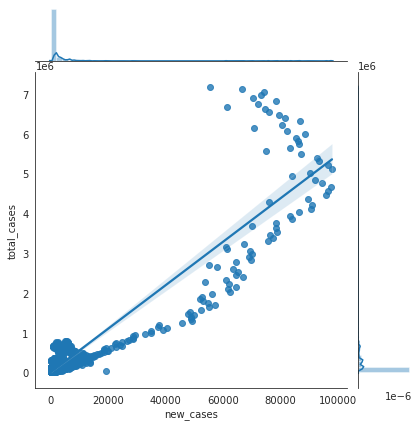

In [28]:
with sns.axes_style('white'):
    sns.jointplot("new_cases", "total_cases", data=df1, kind='reg')

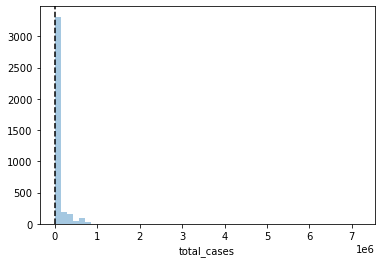

In [29]:
sns.distplot(df1['total_cases'], kde=False);
plt.axvline(0, color="k", linestyle="--");

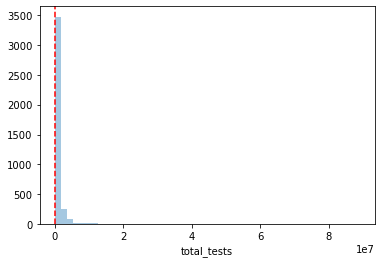

In [30]:
sns.distplot(df1['total_tests'], kde=False);
plt.axvline(0, color="r", linestyle="--");

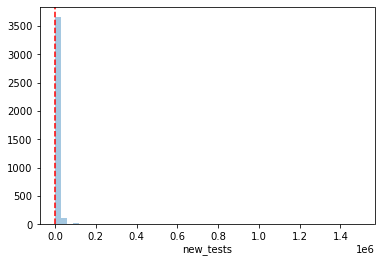

In [31]:
sns.distplot(df1['new_tests'], kde=False);
plt.axvline(0, color="r", linestyle="--");

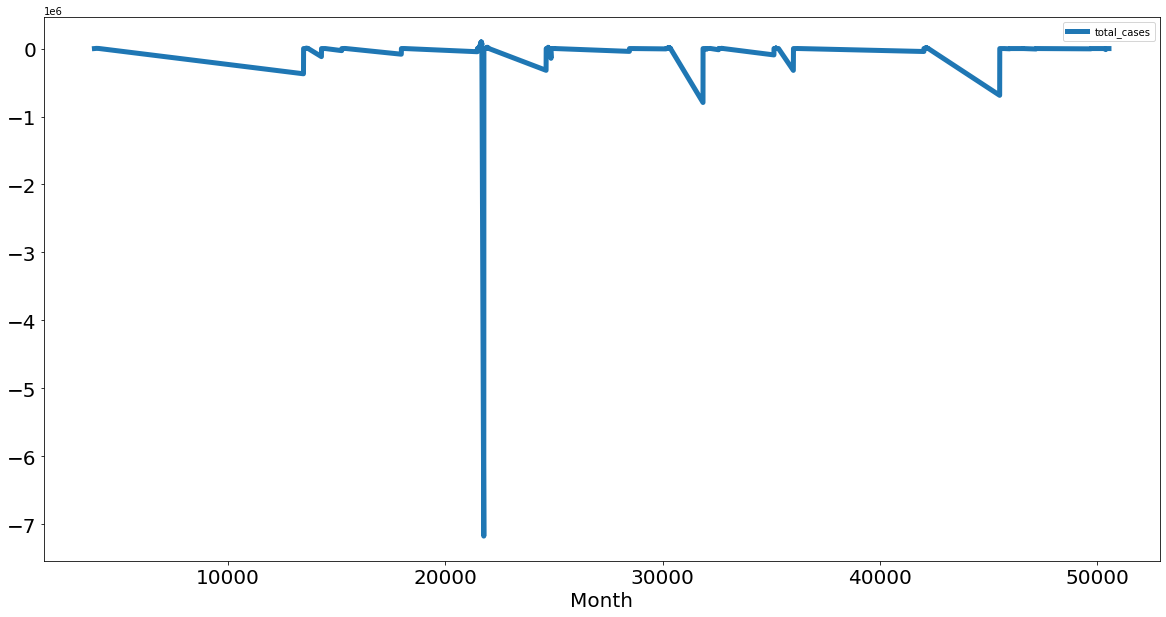

In [32]:
total_cases.diff().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20);


Text(0.5, 0, 'Month')

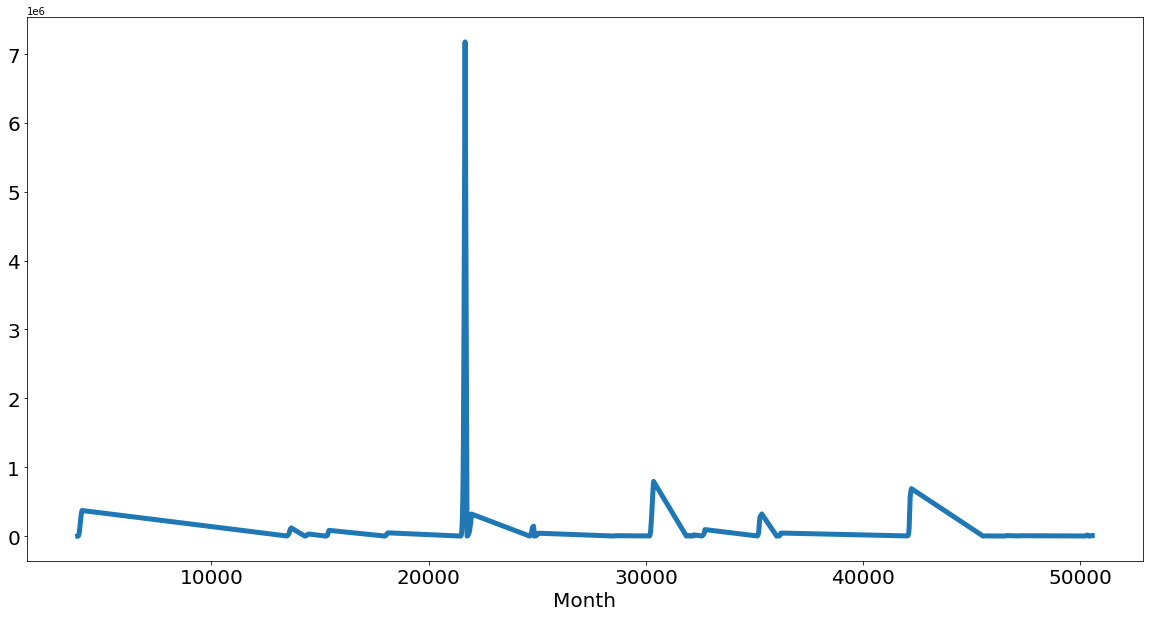

In [33]:
df1.total_cases.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel("Month",fontsize=20)

Text(0.5, 0, 'Month')

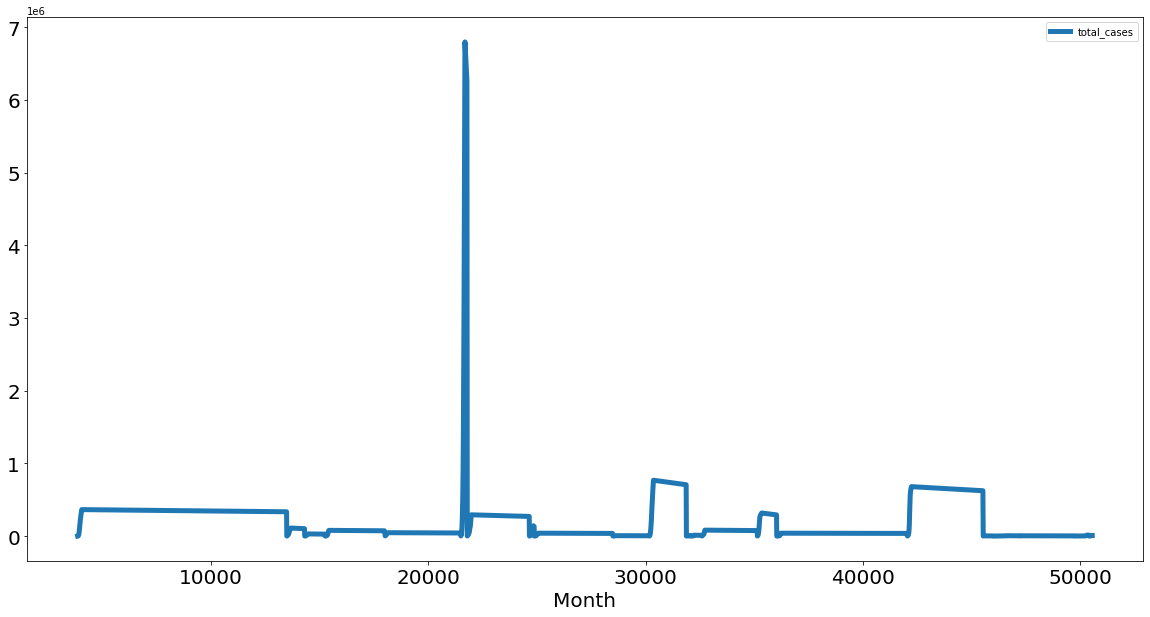

In [34]:
total_cases=df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel("Month",fontsize=20)